# This notebook 

In this notebook are items that were checked outside of the data-analysis notebook, mainly to test issues or examine how they behave for the specifics of the data. For example, many of the features are inbalanced with many more zero than non-zero values. 

## How correlation coefficient is affected by zeros 

- The raw feature data is highly imbalanced in the sense that for most features, there are a lot more zero values than non-zero values. This is also true for the target data, e.g., predicted revenue. 
- The correlation coefficient of two arrays can be strongly influenced by this. A few examples are shown below. 
- The question is then: how to properly estimate the correlation between the different variables? between the features, and between the features and the target.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [101]:
def check_corr_coef_matched(x, y): 
    
    r = []
    ratio_of_padding = []
    
    for num_of_zeros in range(1, 1000):
        x_dummy = np.pad(x, (num_of_zeros, 0), 'constant', constant_values=(0, 0))
        y_dummy = np.pad(y, (num_of_zeros, 0), 'constant', constant_values=(0, 0))
        r.append(np.corrcoef(x_dummy, y_dummy)[0][1])
        ratio_of_padding.append(len(x)/num_of_zeros)
        
    
    return r, ratio_of_padding    

In [117]:
def check_corr_coef_not_matched(x, y, mu, sigma, prob = 0.1): 
    
    r = []
    ratio_of_padding = []
    
    for num_of_zeros in range(1, 1000):
        x_dummy = np.pad(x, (num_of_zeros, 0), 'constant', constant_values=(0, 0))
        y_dummy = np.pad(y, (num_of_zeros, 0), 'constant', constant_values=(0, 0))
        
        for k in range(num_of_zeros):
            if np.random.uniform(0,1) < prob:
                y_dummy[k] = np.random.normal(mu, sigma, 1)[0]
        
        r.append(np.corrcoef(x_dummy, y_dummy)[0][1])
        ratio_of_padding.append(len(x)/num_of_zeros)
        
    
    return r, ratio_of_padding   

In [88]:
mu, sigma = 0, 3

In [95]:
x = np.arange(10, 20)
# y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])
y = [k + np.random.normal(mu, sigma, 1)[0] for k in x]
print(x)
print(y)

[10 11 12 13 14 15 16 17 18 19]
[13.402502773032753, 10.58666927691781, 6.36120424521987, 14.895940515068066, 10.388621908630308, 16.00164265369218, 16.547003521180567, 13.510031175730177, 13.109012961521131, 18.01851999194665]


In [96]:
actual_corr = np.corrcoef(x, y)
print(actual_corr)

[[1.         0.56221753]
 [0.56221753 1.        ]]


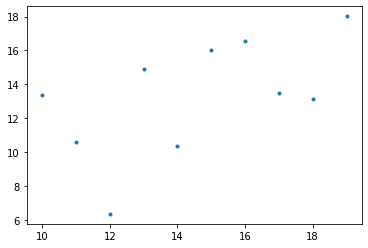

In [97]:
plt.plot(x, y, '.')
plt.show()

In [98]:
r, ratio_of_padding = check_corr_coef_matched(x, y)

In [99]:
r.append(actual_corr[0][1])
ratio_of_padding.append(11)

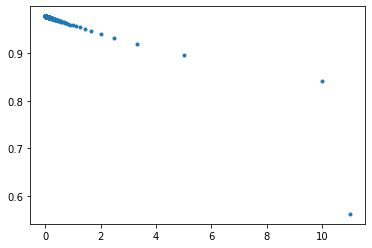

In [100]:
plt.plot(ratio_of_padding, r, '.')
plt.show()

As can be seen, when the zeros in both arrays are perfectly matched, the correlation coefficient increases with the number of zeros. The value at x = 11 is the correlation of the non-padded arrays. 

In [118]:
r_not_matched, ratio_of_padding_not_matched = check_corr_coef_not_matched(x, y, mu, sigma)

In [119]:
r_not_matched.append(actual_corr[0][1])
ratio_of_padding_not_matched.append(11)

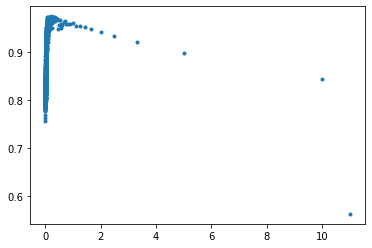

In [120]:
plt.plot(ratio_of_padding_not_matched, r_not_matched, '.')
plt.show()

If 10% of the padded zero values in one array are matched with non-zero values at the other array, it strongly impact the correlation from when the ratio of the padding to the original size array (here it is len(x) = len(y) = 10) is lower than 1 -> the padding is higher than 10 (so now x is = [0 0 0 0 0 0 0 0 0 0] + x). 

In [121]:
r_not_matched, ratio_of_padding_not_matched = check_corr_coef_not_matched(x, y, mu, sigma, prob = 0.5)

In [122]:
r_not_matched.append(actual_corr[0][1])
ratio_of_padding_not_matched.append(11)

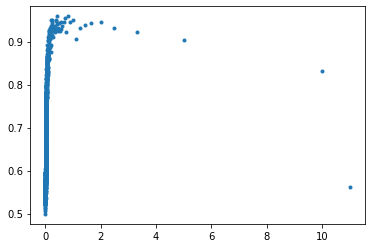

In [123]:
plt.plot(ratio_of_padding_not_matched, r_not_matched, '.')
plt.show()

And this is how it looks for when 50% of the padded zero are not matched. Obviously, the correlation goes down. 

## Log histograms

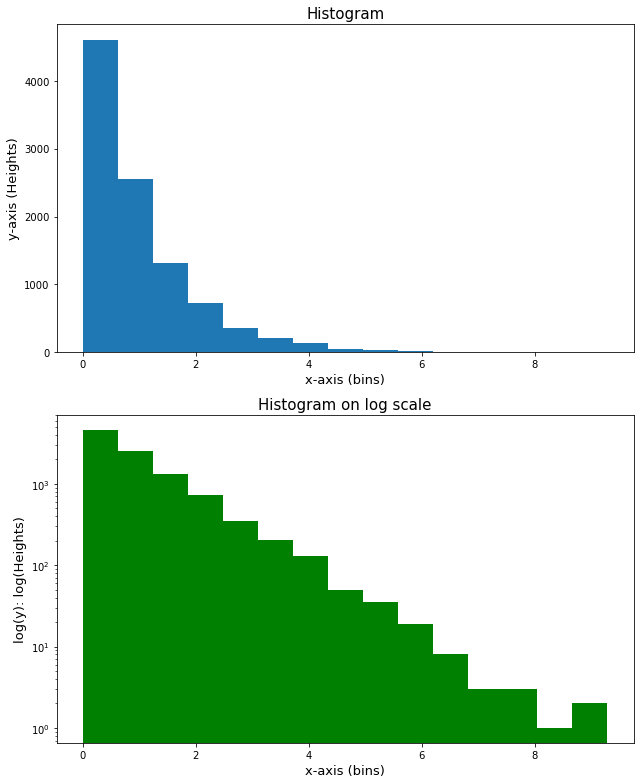

In [6]:
# Preparing the data for the plots
np.random.seed(217)
x = np.random.exponential(1, 10000)
nbins = 15

# Resizing the figure
plt.figure(figsize=[9, 11])

# Plotting the histogram without log scale
plt.subplot(211)
plt.hist(x, bins=nbins)
plt.title('Histogram', fontsize=15)
plt.xlabel('x-axis (bins)', fontsize=13)
plt.ylabel('y-axis (Heights)', fontsize=13)
 
# Plotting the histogram on log scale 
plt.subplot(212)
counts, bins, bars = plt.hist(x, bins=nbins, log=True, color='g')
plt.title('Histogram on log scale', fontsize=15)
plt.xlabel('x-axis (bins)', fontsize=13)
plt.ylabel('log(y): log(Heights)', fontsize=13)

plt.tight_layout()
plt.show()

In [13]:
counts.shape

(15,)

In [18]:
bins

array([3.13723793e-06, 6.19088877e-01, 1.23817462e+00, 1.85726036e+00,
       2.47634610e+00, 3.09543184e+00, 3.71451758e+00, 4.33360332e+00,
       4.95268906e+00, 5.57177480e+00, 6.19086054e+00, 6.80994628e+00,
       7.42903202e+00, 8.04811776e+00, 8.66720350e+00, 9.28628924e+00])

In [17]:
bins_center = []
for k in range(len(bins) - 1):
    bins_center.append((bins[k] + bins[k+1])/2)

print(bins_center)

[0.30954600726697906, 0.9286317473250789, 1.5477174873831787, 2.166803227441279, 2.7858889674993783, 3.4049747075574786, 4.024060447615579, 4.643146187673678, 5.262231927731778, 5.881317667789878, 6.500403407847978, 7.119489147906078, 7.7385748879641785, 8.357660628022277, 8.976746368080377]


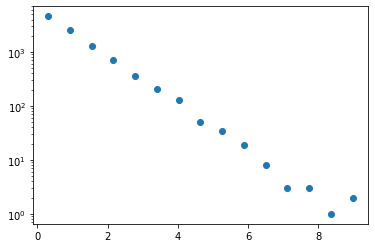

In [37]:
plt.scatter(bins_center, counts)
plt.yscale('log')

In [33]:
model = np.polyfit(bins_center, np.log(counts), 1)
slope = model[0]
intercept = model[1]
print(slope, intercept)

-0.9866521714697215 8.679377087848549


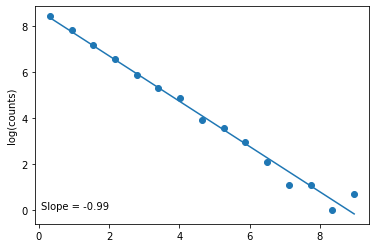

In [48]:
plt.scatter(bins_center, np.log(counts))
plt.plot(bins_center, [(slope*k + intercept) for k in bins_center])
plt.ylabel('log(counts)')
plt.text(0.05, 0.05, 'Slope = {:.2}'.format(slope))
plt.show()

## Log - Log histograms

In [49]:
a = 5. # shape
samples = 1000
s = np.random.power(a, samples)

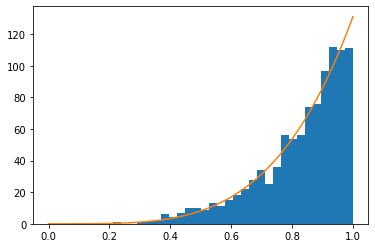

In [51]:
count, bins, ignored = plt.hist(s, bins=30)
x = np.linspace(0, 1, 100)
y = a*x**(a-1.)
normed_y = samples*np.diff(bins)[0]*y
plt.plot(x, normed_y)
plt.show()

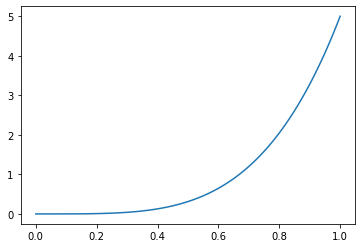

In [52]:
plt.plot(x, y)
plt.show()

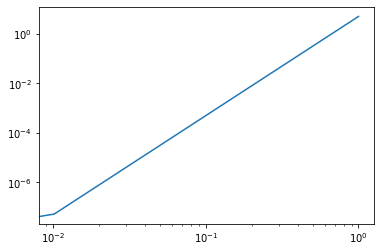

In [53]:
plt.loglog(x, y)
plt.show()

# Mutual Information 

The following example was adapted from [here](https://stackoverflow.com/questions/70820610/discrete-features-parameter-in-sklearn-feature-selection-mutual-info-classif) on stockoverflow.   
Comment: in this case, with the target and cat_feature being random, the result of 0 mutual information actually make more sense than any positive number. 

In [6]:
from sklearn.feature_selection import mutual_info_classif
from time import time
from scipy.sparse import csr_matrix
import numpy as np

If we set the flag discrete_features = 'auto', it will determine that discrete_features = True if the input is sparse; and if the input is dense it will treat it as continuous.

For example:

In [3]:
np.random.seed(111)

In [4]:
target = np.random.binomial(1,0.5,20)
cat_feature = np.random.binomial(3,0.5,(20,2))

In [8]:
print(target)
print(cat_feature)

[1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1]
[[2 2]
 [2 3]
 [2 2]
 [1 0]
 [1 0]
 [2 2]
 [2 1]
 [3 1]
 [2 1]
 [1 2]
 [1 1]
 [1 3]
 [3 2]
 [0 3]
 [3 2]
 [1 3]
 [1 1]
 [0 0]
 [0 1]
 [0 1]]


In [9]:
mutual_info_classif(cat_feature, target, discrete_features=True)

array([0.03219502, 0.00257154])

it's different from specifying it False :

In [10]:
mutual_info_classif(cat_feature, target, discrete_features=False)

array([0.00565161, 0.        ])

Now if we use 'auto' its the same as discrete_features=False since the input is dense:

In [11]:
mutual_info_classif(cat_feature, target, discrete_features='auto')

array([0, 0])

We can make the input sparse, and get the same output as when we specify discrete = True:

In [12]:
cat_feature = csr_matrix(cat_feature)
print(type(cat_feature))

mutual_info_classif(cat_feature, target, discrete_features="auto")

<class 'scipy.sparse.csr.csr_matrix'>


array([0.03219502, 0.00257154])

You have this option because we often one-hot encode categorical features, and a sparse matrix is more suitable given the amount of zeros.

# Density Scatter Plot

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

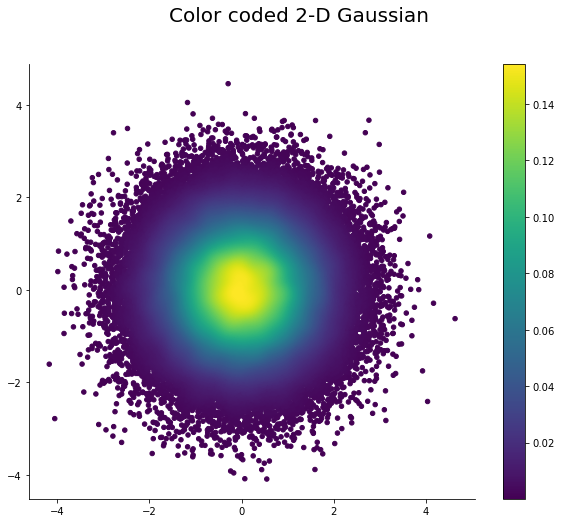

In [26]:
# Generate fake data
x = np.random.normal(size=100000)
y = np.random.normal(size=100000)

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

fig, ax = plt.subplots(figsize = (10, 8))
im = ax.scatter(x, y, c=z, s=20)
fig.colorbar(im, ax=ax)
fig.suptitle("Color coded 2-D Gaussian", fontsize = 20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

In [38]:
# Just the positive values of the fake data
x_pos = [elem for ind, elem in enumerate(x) if elem > 0 and y[ind] > 0]
x_pos = np.asarray(x_pos)
y_pos = [elem for ind, elem in enumerate(y) if elem > 0 and x[ind] > 0]
y_pos = np.asarray(y_pos)

In [39]:
print(len(x_pos))
print(len(y_pos))

24874
24874


In [40]:
y_pos[:10]

array([1.16280698, 3.14262981, 3.6596958 , 2.10862453, 3.66599334,
       3.31715707, 3.39561426, 2.95465985, 3.8079867 , 2.20559588])

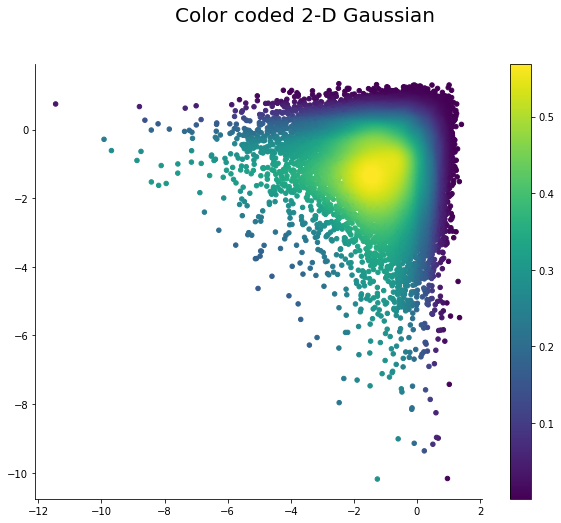

In [41]:
# Calculate the point density
xy_pos = np.vstack([x_pos, y_pos])
z_pos = gaussian_kde(xy_pos)(xy_pos)

# Sort the points by density, so that the densest points are plotted last
idx_pos = z_pos.argsort()
x_pos, y_pos, z_pos = x_pos[idx_pos], y_pos[idx_pos], z_pos[idx_pos]

fig, ax = plt.subplots(figsize = (10, 8))
im = ax.scatter(np.log(x_pos), np.log(y_pos), c=z_pos, s=20)
fig.colorbar(im, ax=ax)
fig.suptitle("Color coded 2-D Gaussian", fontsize = 20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

# K - means 

In [1]:
import matplotlib
matplotlib.use('nbagg')

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import time

In [2]:
# plt.style.use("seaborn-whitegrid")
# plt.rc("figure", autolayout=True)
# plt.rc(
#     "axes",
#     labelweight="bold",
#     labelsize="large",
#     titleweight="bold",
#     titlesize=14,
#     titlepad=10,
#     )

In [3]:
data_file_name = "Data/practice_data_for_Kmeans/housing.csv"

In [4]:
df = pd.read_csv(data_file_name)

In [5]:
print("Shape of data frame: {}".format(df.shape))
df.head(10)

Shape of data frame: (20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


As spatial features, California Housing's 'Latitude' and 'Longitude' make natural candidates for k-means clustering. In this example we'll cluster these with 'MedInc' (median income) to create economic segments in different regions of California.

In [6]:
X = df.loc[:, ["median_income", "latitude", "longitude"]]
X.head()

,median_income,latitude,longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


Since k-means clustering is sensitive to scale, it can be a good idea rescale or normalize data with extreme values. Our features are already roughly on the same scale, so we'll leave them as-is.

In [7]:
# Create cluster feature

num_of_clusters = 6

start_time = time.time()
kmeans = KMeans(n_clusters=num_of_clusters)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")
end_time = time.time()

print("The Kmeans calculation for 3 dimensions and {} rows was:\n{}sec".format(X.shape[0], end_time - start_time))

X.head()

The Kmeans calculation for 3 dimensions and 20640 rows was:
0.363112211227417sec


,median_income,latitude,longitude,Cluster
0,8.3252,37.88,-122.23,2
1,8.3014,37.86,-122.22,2
2,7.2574,37.85,-122.24,2
3,5.6431,37.85,-122.25,2
4,3.8462,37.85,-122.25,0


Now let's look at a couple plots to see how effective this was. First, a scatter plot that shows the geographic distribution of the clusters. It seems like the algorithm has created separate segments for higher-income areas on the coasts.

<IPython.core.display.Javascript object>


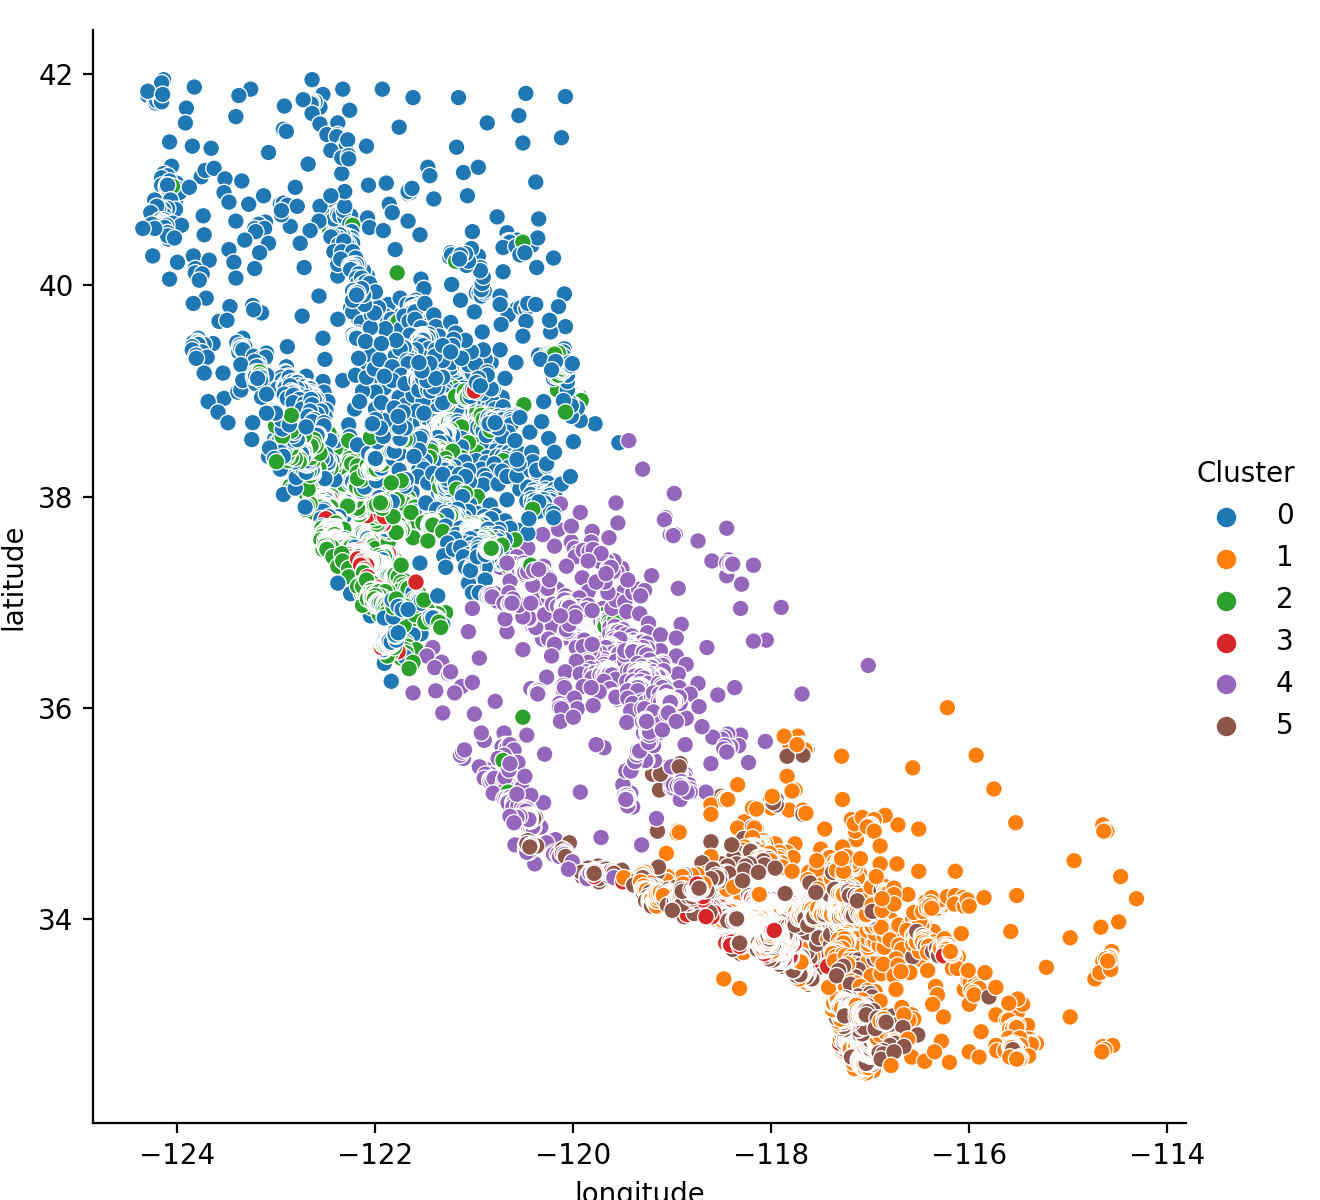

In [8]:
sns.relplot(
    x="longitude", y="latitude", hue="Cluster", data=X, height=6)

plt.show()

The target in this dataset is MedHouseVal (median house value). These box-plots show the distribution of the target within each cluster. If the clustering is informative, these distributions should, for the most part, separate across MedHouseVal, which is indeed what we see.

<IPython.core.display.Javascript object>


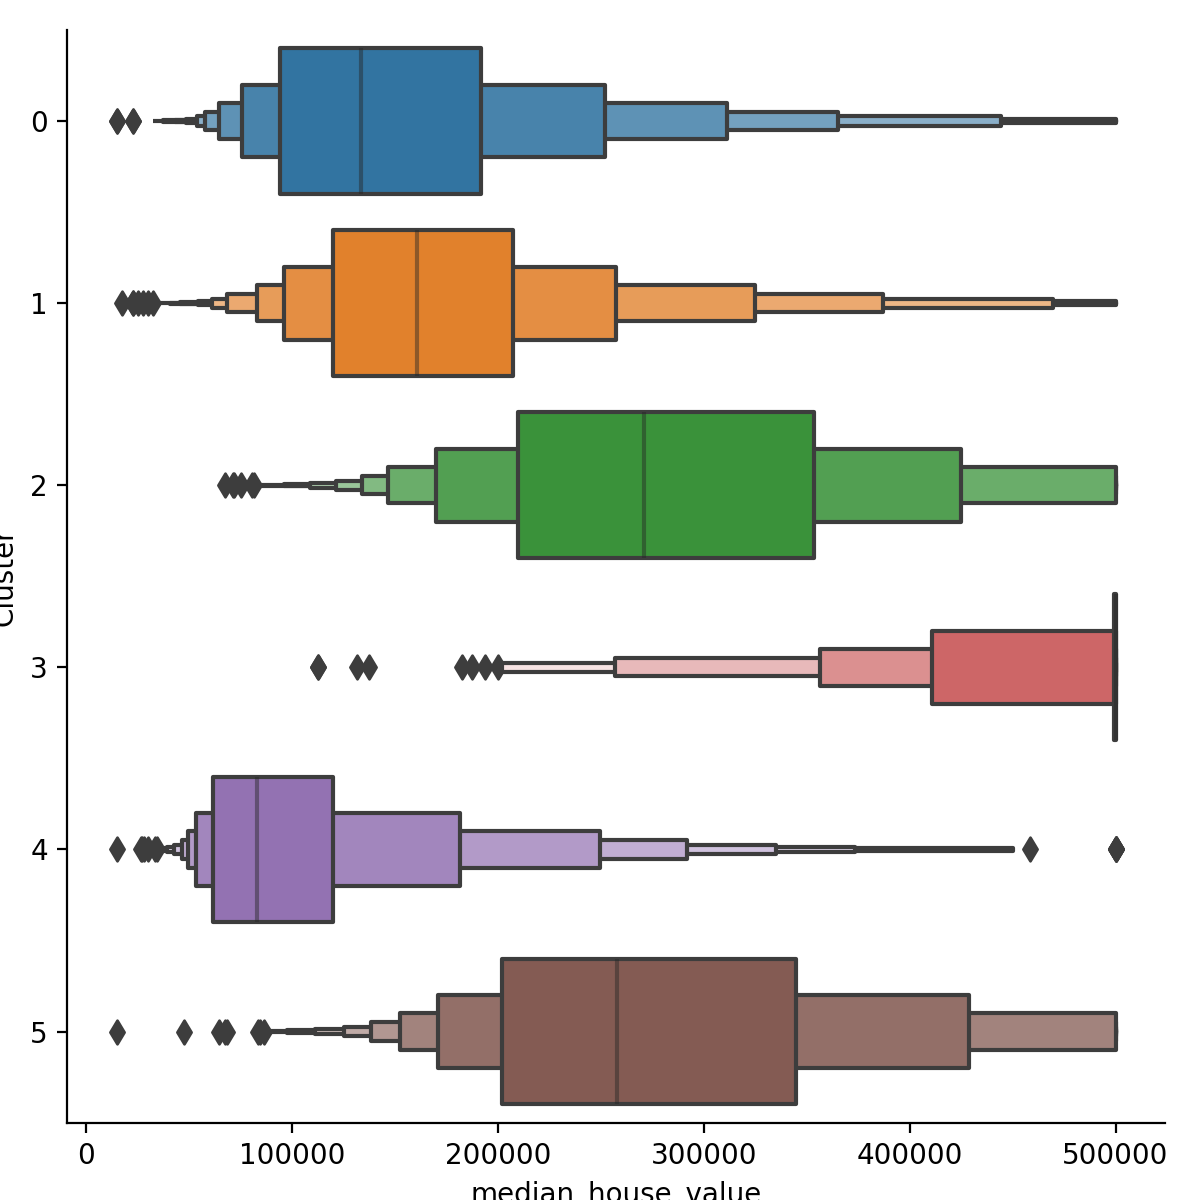

In [9]:
X["median_house_value"] = df["median_house_value"]
sns.catplot(x="median_house_value", y="Cluster", data=X, kind="boxen", height=6)
plt.show()

<IPython.core.display.Javascript object>


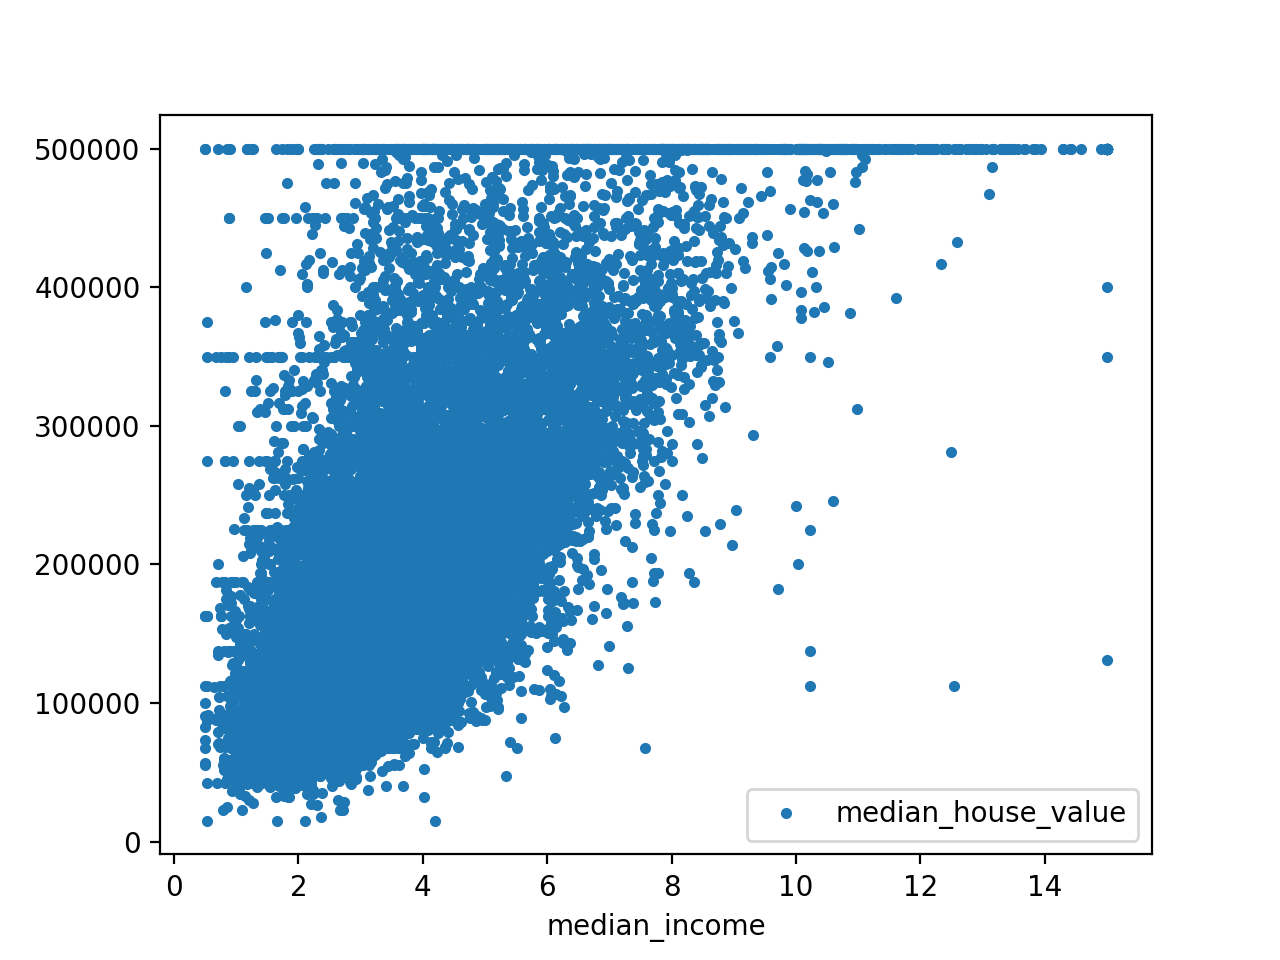

In [10]:
X.plot(x='median_income', y='median_house_value', style='.')
plt.show()

<IPython.core.display.Javascript object>


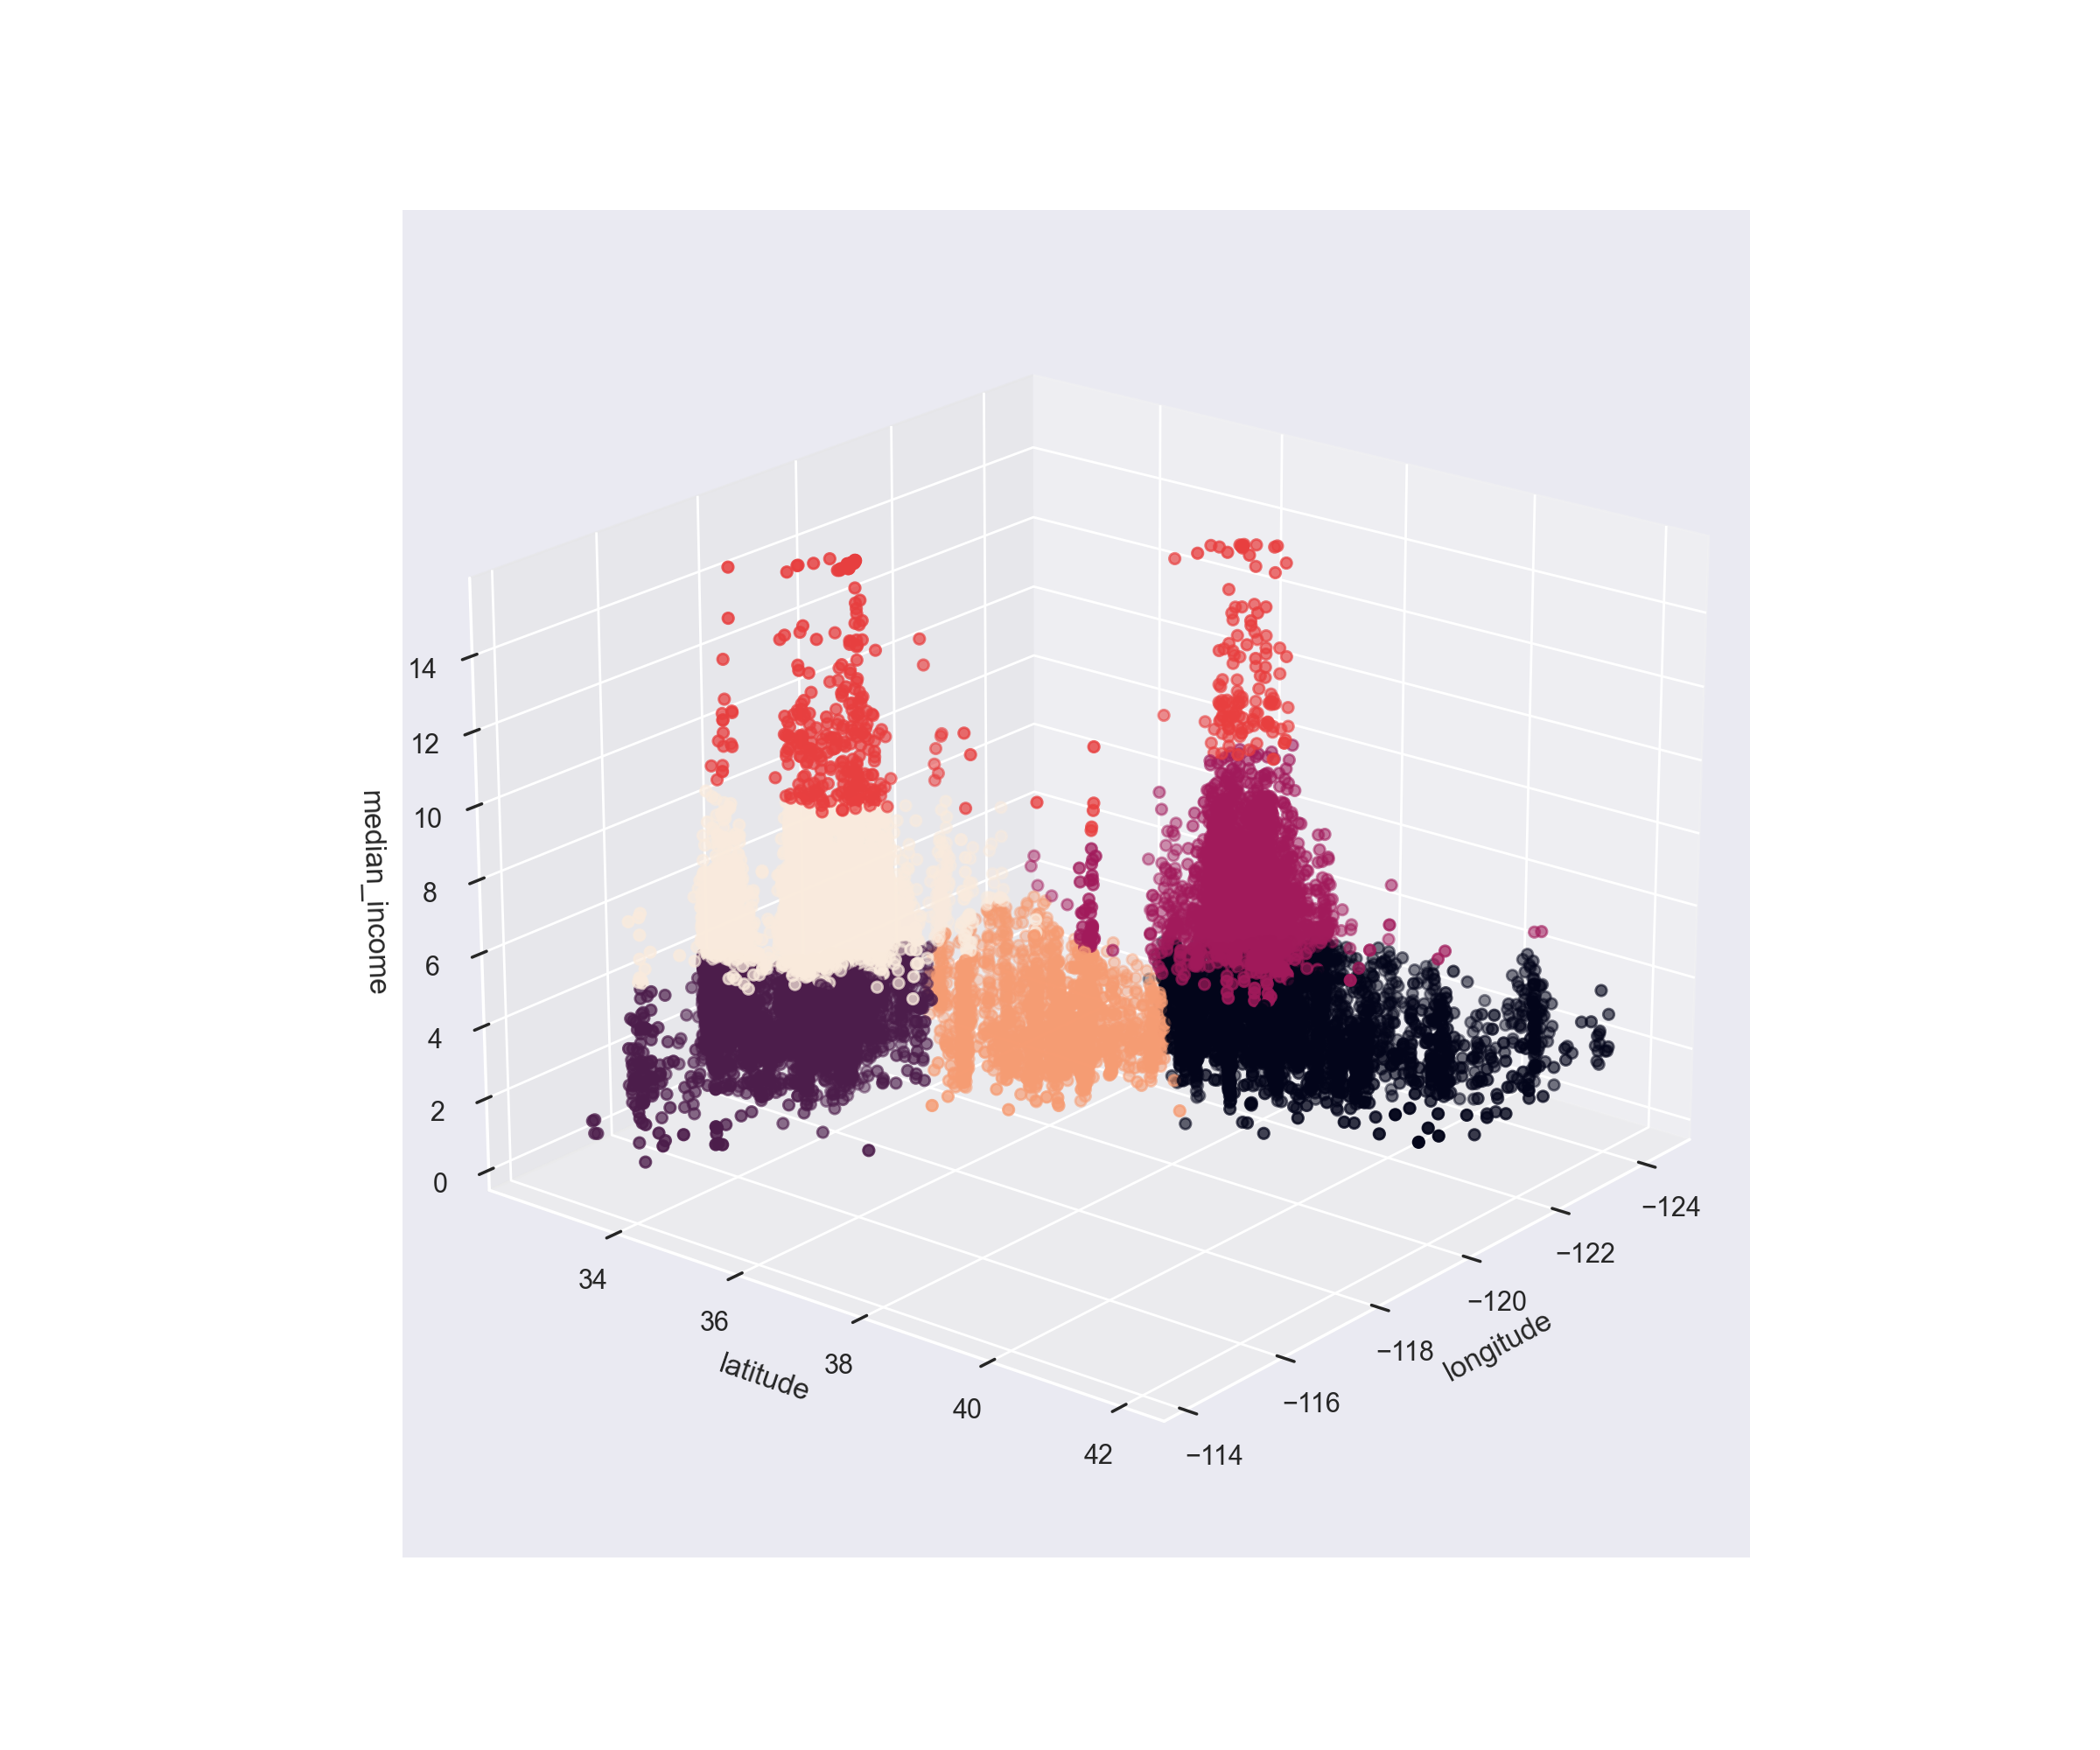

In [11]:
sns.set(style = "darkgrid")

fig = plt.figure(figsize = (12, 10))
ax = Axes3D(fig)
ax = fig.add_subplot(111, projection = '3d')

x = X['longitude']
y = X['latitude']
z = X['median_income']

ax.set_xlabel("longitude")
ax.set_ylabel("latitude")
ax.set_zlabel("median_income")

ax.scatter(x, y, z, c = X['Cluster'])

plt.show()

## Random shuffling of an array 

In [2]:
import numpy as np

In [15]:
# np.random.seed(13)

a = np.arange(20)
print("a:\n{}".format(a))
print()
b = np.random.permutation(a)
print("a shuffled:\n{}".format(b))

a:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]

a shuffled:
[14  6 13 19  2 15  1  5 16  7  4  3  0 12 11 18  8  9 17 10]


In [7]:
chunk_size = [10, 5, 3, 2]
splits_at = np.cumsum(chunk_size)
print(splits)

[10 15 18 20]


In [9]:
splits = np.split(b, splits_at)
print(splits)
print()

for split in splits:
    print(split)

[array([11, 12,  0,  1,  8,  5,  7, 15, 14, 13]), array([ 3, 17,  9,  4,  2]), array([ 6, 19, 10]), array([16, 18]), array([], dtype=int64)]

[11 12  0  1  8  5  7 15 14 13]
[ 3 17  9  4  2]
[ 6 19 10]
[16 18]
[]


## Pandas Join Inner 

In [2]:
import pandas as pd

In [11]:
A = pd.DataFrame()
A['letters'] = ['a', 'b', 'c', 'd']
A['num'] = [1, 2, 3, 4]
A.head()

,letters,num
0,a,1
1,b,2
2,c,3
3,d,4


In [12]:
B = pd.DataFrame()
B['letters'] = ['a', 'f', 'c', 'g']
B['names'] = ['alex', 'francis', 'clara', 'goddes']
B.head()

,letters,names
0,a,alex
1,f,francis
2,c,clara
3,g,goddes


In [19]:
result = pd.merge(A, B, on="letters")
result = result[["num", "names"]]
result.head()

,num,names
0,1,alex
1,3,clara


# Entropy 

In [18]:
from scipy.stats import entropy
import numpy as np

In [47]:
array = np.array([1/3, 1/3, 1/3, 0, 0])
entropy(array, base=2)/np.log2(len(array))

0.6826061944859853

In [46]:
1.5849/2.3219

0.6825875360695982

In [3]:
entropy([9/10, 1/10], base=2)

0.46899559358928117

In [57]:
data = np.random.random(9)
data = np.append(data, 1)
bins = np.linspace(0, 1, 10)
digitized = np.digitize(data, bins)

In [58]:
data

array([0.71640795, 0.18485048, 0.17735843, 0.95479783, 0.88144831,
       0.70378019, 0.47014807, 0.91221515, 0.55788797, 1.        ])

In [59]:
bins

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [60]:
digitized

array([ 7,  2,  2,  9,  8,  7,  5,  9,  6, 10])

In [34]:
len(bins)

101

In [ ]:
for k in range(len(bins))

In [8]:
a = [k for k in range(11)]
print(a)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [6]:
a = np.asarray(a)
(a < 7).mean()

0.6363636363636364

In [9]:
sum(a < 7) / len(a)

TypeError: '<' not supported between instances of 'list' and 'int'